<a href="https://colab.research.google.com/github/sakshi170920/Myntra_App/blob/main/Retailer_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUSTOMER BEHAVIOUS ANALYTICS**

## We aim to help the retailers by providing data insights on

Customer Behaviour based on a dataset including fields like events (add to cart, transaction, view), unique itemid and timestamp (which records when the event took place) giving several insights on view time, number of transactions, purchase decision factors, etc


In [10]:
import pandas as pd 
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

**Exploratory Data Analysis** 

In [8]:
from google.colab import files
uploaded = files.upload()

Saving events.csv to events.csv


In [11]:
edf=pd.read_csv("events.csv")
edf.head()

,timestamp,visitorid,event,itemid,transactionid
0,1.433220e+12,257597,view,355908,NaN
1,1.433220e+12,992329,view,248676,NaN
2,1.433220e+12,111016,view,318965,NaN
3,1.433220e+12,483717,view,253185,NaN
4,1.433220e+12,951259,view,367447,NaN


In [ ]:
edf.shape[0] #number of user activities

1048575

In [ ]:
edf.isnull().value_counts() #missing values in each column

timestamp  visitorid  event  itemid  transactionid
False      False      False  False   True             1039921
                                     False               8654
dtype: int64

In [ ]:
edf['event'].unique() #types of events 

array(['view', 'addtocart', 'transaction'], dtype=object)

In [ ]:
edf.transactionid[edf.event=='transaction'].isnull().value_counts() #checking missing transactionID

False    8654
Name: transactionid, dtype: int64

In [ ]:
edf.event.value_counts() #count of each event

view           1013165
addtocart        26756
transaction       8654
Name: event, dtype: int64

In [ ]:
samp = edf.duplicated() #removing duplicates
edf = edf[~samp]
edf.reset_index(drop=True, inplace=True)
edf.shape[0] # 1048575 was the original number

912411

In [ ]:
edf.head(10)

,event,itemid
0,view,355908
1,view,248676
2,view,318965
3,view,253185
4,view,367447
5,view,22556
6,view,443030
7,view,439202
8,view,428805
9,view,82389


To know when is the data recorded from we convert the unix timestamp to datetime (which is a module imported above)

**Retailers get to know the exact date and time of the view, addtocart and transaction events**

In [15]:
list=[]
for i, unix in enumerate(edf['timestamp']):
    timestamp, ms = divmod(unix, 1000)

    # create the datetime from the timestamp 
    # add the milliseconds separately
    dt = datetime.datetime.fromtimestamp(timestamp) + datetime.timedelta(milliseconds=ms)

    formatted_time = dt.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3]
    list.append(formatted_time)

edf['date_time']=pd.DataFrame({'date_time':list})
edf.head(20)

,timestamp,visitorid,event,itemid,transactionid,date_time
0,1.433220e+12,257597,view,355908,NaN,2015-06-02 04:40:00.000
1,1.433220e+12,992329,view,248676,NaN,2015-06-02 04:40:00.000
2,1.433220e+12,111016,view,318965,NaN,2015-06-02 04:40:00.000
3,1.433220e+12,483717,view,253185,NaN,2015-06-02 04:40:00.000
4,1.433220e+12,951259,view,367447,NaN,2015-06-02 04:40:00.000
5,1.433220e+12,972639,view,22556,NaN,2015-06-02 04:40:00.000
6,1.433220e+12,810725,view,443030,NaN,2015-06-02 04:40:00.000
7,1.433220e+12,794181,view,439202,NaN,2015-06-02 04:40:00.000
8,1.433220e+12,824915,view,428805,NaN,2015-06-02 04:40:00.000
9,1.433220e+12,339335,view,82389,NaN,2015-06-02 04:40:00.000


**Retailers get to know the number of unique visitors per event **

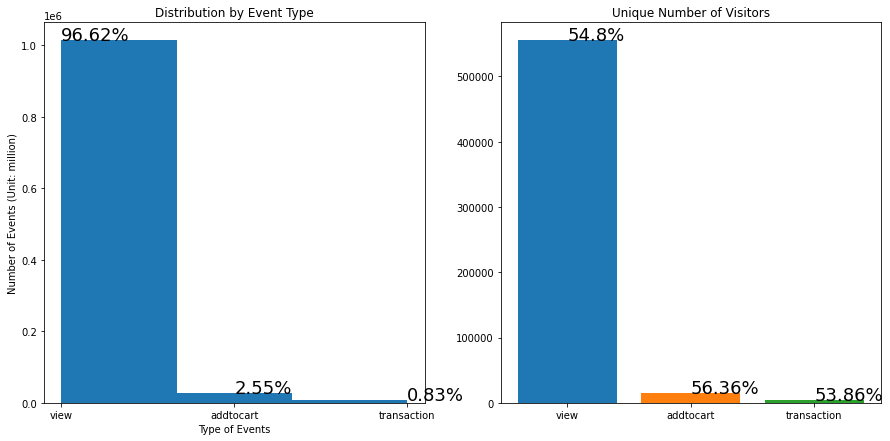

In [16]:
totalcases=edf.shape[0]
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,7))

# distribution of event type
ax1.hist(edf['event'], bins=3)
ax1.set_xlabel('Type of Events')
ax1.set_ylabel('Number of Events (Unit: million)')
ax1.set_title('Distribution by Event Type')
for x,counts in zip(edf['event'].unique().tolist(), edf['event'].value_counts().tolist()):
    text=str(round((counts/totalcases)*100,2)) +'%'
    ax1.text(x, counts, text, fontsize=18)
    
# unique number of visitors by event
for event in edf['event'].unique().tolist():
    height=len(edf['visitorid'][edf['event']==event].unique())
    ax2.bar(x=event, height=height)
    
    text=len(edf['visitorid'][edf['event']==event].unique())/len(edf['visitorid'][edf['event']==event])
    text=str(round(text*100,2)) + '%'
    ax2.text(event, height, text, fontsize=18)
ax2.set_title('Unique Number of Visitors')
plt.show()

**DISTRIBUTION OF EVENTS**


View 96.35%
Add to Cart 2.71%
Transation 0.94%

**NUMBER OF UNIQUE VISITORS**

Total views of unique visitors are approximately 550000
Total views = ~900000
Hence it's 63.15% which means on an average each visitor caused 3 actions 

**Retailers get to know how many times was the item viewed before purchase and the number of instant purchases**

In [14]:
item_tra=edf[['visitorid','itemid','date_time']][edf['event']=='transaction']
# obtain vistor id,item id, and date time of 'add to cart'
item_atc=edf[['visitorid','itemid','date_time']][edf['event']=='addtocart']
# obtain vistor id,item id, and date time of 'view'
item_viw=edf[['visitorid','itemid','date_time']][edf['event']=='view']

In [15]:
m=item_tra.merge(item_atc, how='inner', on=['visitorid','itemid'], suffixes=[' (transaction)', ' (add_to_cart)'])
m=m.merge(item_viw, how='inner', on=['visitorid','itemid'])
m=m.rename(columns={'date_time':'date_time (view)'})
m.head()

,visitorid,itemid,date_time (transaction),date_time (add_to_cart),date_time (view)
0,599528,356475,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000
1,599528,356475,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000,2015-06-03 02:53:20.000
2,599528,356475,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000,2015-06-06 22:33:20.000
3,599528,356475,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000,2015-06-08 02:20:00.000
4,599528,356475,2015-06-02 04:40:00.000,2015-06-02 04:40:00.000,2015-06-10 01:33:20.000


In [16]:
m['date_time (transaction)']=pd.to_datetime(m['date_time (transaction)'])
m['date_time (add_to_cart)']=pd.to_datetime(m['date_time (add_to_cart)'])
m['date_time (view)']=pd.to_datetime(m['date_time (view)'])

In [18]:
msk=(m['date_time (transaction)']-m['date_time (view)'])>np.timedelta64(0,'m')
m1=m[msk]

In [19]:
mul_viw=m1.duplicated(subset=['visitorid','itemid'], keep=False)
sig_viw=m1[~mul_viw]
mul_viw=m1[mul_viw]

# last occurrence in duplicates = view when a visitor made purchase
# therefore, filter dataframe to leave only views before last occurence
notlast=mul_viw.duplicated(subset=['visitorid','itemid'], keep='last')  # except for last occurance

# count the number of view
# obtain the average number of it
avg_viw=mul_viw[notlast].groupby(['visitorid','itemid']).count()['date_time (view)'].mean()
print('Average Number of Views Before Purchase: {0:.0f}'.format(avg_viw))

Average Number of Views Before Purchase: 5


In [20]:
mul_viw[notlast].groupby(['visitorid','itemid']).count()['date_time (view)'].describe()


count    943.000000
mean       5.218452
std       26.992194
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      789.000000
Name: date_time (view), dtype: float64

In [21]:
n_viw=mul_viw[notlast].groupby(['visitorid','itemid']).count()['date_time (view)']
n_viw=pd.DataFrame(n_viw)
n_viw.head()

date_time (view)
visitorid itemid                  
1032      243949                 1
2019      393144                 5
          445559                 4
5117      241061                 2
6468      65273                  1

In [22]:
n_viw2=pd.DataFrame(n_viw.value_counts(), columns=['count'])
n_viw2=n_viw2.reset_index()

# add a row with the value of instant purchase
# item view at the time of transaction counted as '0' here
n_viw2.loc[len(n_viw2)]=['0',sig_viw.shape[0]]

# add the column of share in percentage
n_viw2=n_viw2.sort_values('count', ascending=False)
n_viw2['share (%)']=((n_viw2['count']/(n_viw2['count'].sum()))*100).round(2)
n_viw2=n_viw2.reset_index(drop=True)
n_viw2

,date_time (view),count,share (%)
0,0,663,41.28
1,1,377,23.47
2,3,158,9.84
3,2,141,8.78
4,5,60,3.74
5,7,47,2.93
6,4,43,2.68
7,11,19,1.18
8,8,12,0.75
9,6,12,0.75


In [23]:
n_viw3=n_viw2[0:5].copy()
others=n_viw2[5::].sum().tolist()
others[0]='others'
n_viw3.loc[len(n_viw3)]=others

# set new index
n_viw3['index']=['instant purchase', 'view 1', 'view 2','view 3', 'view 5', 'others']
n_viw3=n_viw3.set_index(['index'])

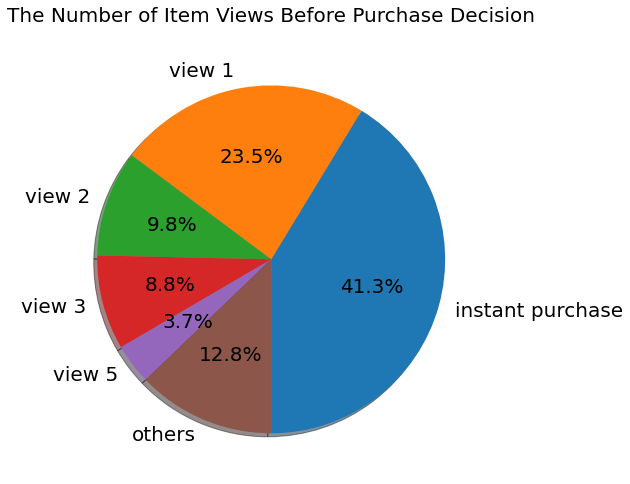

In [24]:
n_viw3.plot(y='share (%)', kind='pie', autopct='%1.1f%%',  shadow=True, startangle=-90, legend=False, figsize=(8,8), fontsize=20)
plt.title('The Number of Item Views Before Purchase Decision', fontsize=20, pad=20)
plt.ylabel('')
plt.show()

**Retailer enters the ITEMID and gets to know the total number of views, addtocart and transaction events per ITEMID**

In [13]:
edf.head()

,timestamp,visitorid,event,itemid,transactionid
0,1.433220e+12,257597,view,355908,NaN
1,1.433220e+12,992329,view,248676,NaN
2,1.433220e+12,111016,view,318965,NaN
3,1.433220e+12,483717,view,253185,NaN
4,1.433220e+12,951259,view,367447,NaN


In [64]:
tedf = edf.drop(['timestamp','visitorid','transactionid','date_time'], axis=1, inplace=False)

In [40]:
tedf.set_index('itemid')

,event
itemid,
355908,view
248676,view
318965,view
253185,view
367447,view
...,...
447661,view
40140,view
272976,view


In [42]:
m = tedf.iloc[id]['event'] 
print(m == 'view')

True


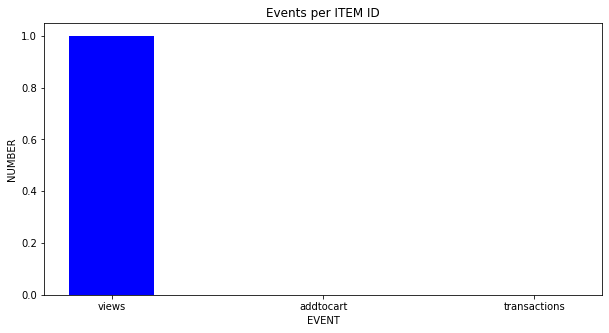

In [67]:
import numpy as np
import matplotlib.pyplot as plt

itemid = 319880
m = tedf.iloc[id]['event'] 
tot_views=0
tot_atc=0
tot_trans=0

for id in tedf.index:
  if((id == itemid) & (m == 'view')):
    tot_views +=1
  if((id == itemid) & (m == 'addtocart')):
    tot_atc +=1
  if((id == itemid) & (m == 'transaction')):
    tot_trans +=1

x = [tot_views,tot_atc,tot_trans]
labels = ['views','addtocart','transactions']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(labels, x, color ='blue',width = 0.4)
 
plt.xlabel("EVENT")
plt.ylabel("NUMBER")
plt.title("Events per ITEM ID")
plt.show()